# Decision Tree Worksheet

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

!pip install graphviz

import graphviz

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [3]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=20, min_samples_leaf=3)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3)

Print accuracy of training and validation data.

In [4]:
## YOUR CODE HERE

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  94.39999999999999
Validation Accuracy is  71.42857142857143


Make a model with a low max-depth and higher minimum sample leafs.

In [5]:
## YOUR CODE HERE
decision_tree2 = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=30)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30)

Print accuracy of training and validation data.

In [6]:
## YOUR CODE HERE
y_train_pred2=decision_tree2.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred2)*100)
y_val_pred2=decision_tree2.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred2)*100)

Training Accuracy is  77.60000000000001
Validation Accuracy is  77.77777777777779


Explain the accuracy results below. 

The training accuracy drastically decreased as the max depth decreased and the minimum amount of sample per leaf increased. On the other hand, the validation accuracy increased but by a miniscule amount.

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7233695652173914


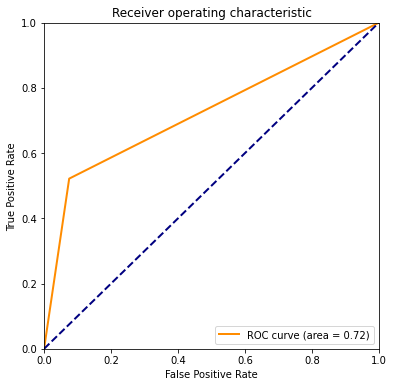

In [7]:
## YOUR CODE HERE

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred2[:])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

print(roc_auc)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

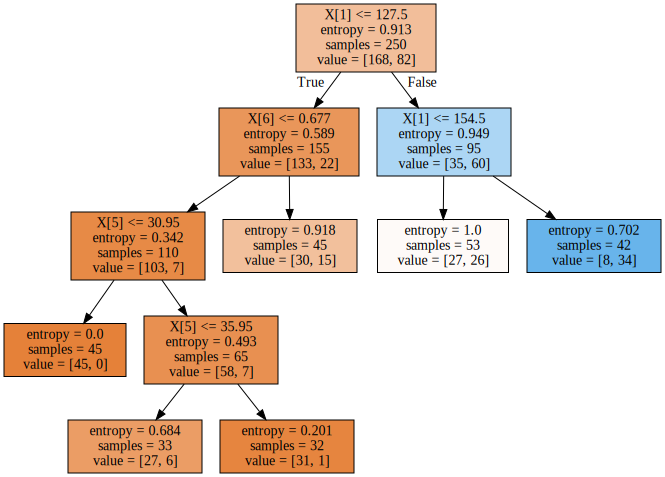

In [8]:
## YOUR CODE HERE
dot_data2 = tree.export_graphviz(decision_tree2, out_file=None, filled=True)

graph = graphviz.Source(dot_data2)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

X[n] is the feature of the data at index n

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is X[1] <= 127.5

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

The training accuracy will be 100% and the testing accuracy will be very low.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [9]:
## YOUR CODE HERE
decision_tree3 = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree3.fit(X_train, y_train)

y_train_pred3 = decision_tree3.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred3)*100)
y_val_pred3 = decision_tree3.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred3)*100)

Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [10]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [11]:
## YOUR CODE HERE
y_train_pred4=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred4)*100)
y_val_pred4=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred4)*100)

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937


How did the accuracy compare to the decision tree's accuracy?

The training accuracy was also 100% which was the same as the decision tree's training accuracy. The validation accuracy was slightly lower than the decision tree's validation accuracy.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [12]:
## YOUR CODE HERE

features = random_forest.feature_importances_.argsort()
# for i in range(len(features)):
#     print(names[features[i]])

print(features)
# print(features)
# print(features.argsort())
print(names[features[-1]], 
names[features[-2]], 
names[features[-3]], '\n')

[0 3 2 5 6 7 4 1]
plas test age 



Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

NameError: name 'xs' is not defined

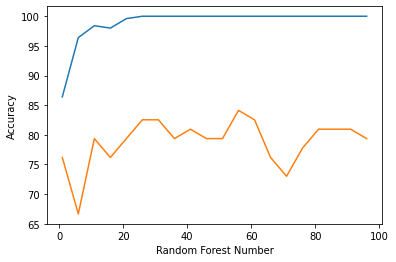

In [13]:
forest_num = []
training_acc_data = []
test_acc_data = []

for i in range(1, 100, 5):
    forest_num.append(i);
    #print("Random foests: ", i)
    random_forest2 = RandomForestClassifier(n_estimators=i)

    # Training/fitting the model with training data
    random_forest2.fit(X_train, y_train)
    
    y_train_pred5=random_forest2.predict(X_train)
    train_acc_score = accuracy_score(y_train, y_train_pred5)*100
    training_acc_data.append(train_acc_score)

    #print("Training Accuracy is ", accuracy_score(y_train, y_train_pred5)*100)
    y_val_pred5=random_forest2.predict(X_val)
    test_acc_score = accuracy_score(y_val,y_val_pred5)*100
    test_acc_data.append(test_acc_score)
    #print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred5)*100)

plt.xlabel("Random Forest Number")
plt.ylabel("Accuracy")
plt.plot(forest_num, training_acc_data)
plt.plot(forest_num, test_acc_data)

plt.plot(xs, y_1s, "-b", label="Training")
plt.plot(xs, y_2s, "-g", label = "Testing")
plt.legend()

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

0.7635869565217391


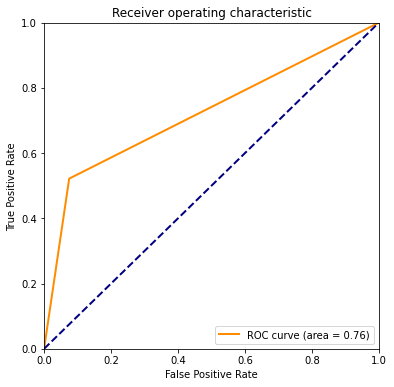

In [ ]:
## YOUR CODE HERE

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_val, y_val_pred4[:])

# Calculate the area under the ROC curve
roc_auc4 = metrics.auc(fpr4, tpr4)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=867a077d-cc4a-444a-b148-d2ffaf2ad44b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>